# Use LLM to extract OCR

In [1]:
import base64
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from IPython.display import Markdown, Image, display

In [2]:
def convert_image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        img_bytes = img_file.read()
    image_base64 = base64.b64encode(img_bytes).decode('utf-8')
    base64_with_prefix = f"data:image/png;base64,{image_base64}"
    return base64_with_prefix

In [3]:
# Load and convert image to base64
# Update with your actual image file path
dir = "/Users/xyz-ai/Developer/data/jfk/images/images/20250318/198-10007-10029/"
image_paths = ["198-10007-10029_page_001_img_01.png",
               "198-10007-10029_page_002_img_01.png",
               "198-10007-10029_page_003_img_01.png",
               "198-10007-10029_page_004_img_01.png",
               "198-10007-10029_page_005_img_01.png",
               "198-10007-10029_page_006_img_01.png",
               "198-10007-10029_page_007_img_01.png",
               "198-10007-10029_page_008_img_01.png",
]

images_base64 = []
for image_path in image_paths:
    image_base64 = convert_image_to_base64(dir+image_path)
    images_base64.append(image_base64)

In [4]:
#display(Image(data=base64.b64decode(images_base64[0])))

In [5]:
prompt1 = """You are an expert OCR and text interpretation system. Your task is to accurately extract and interpret text from images. The images are related to the JFK assassination legally released documents. You will receive one image, which is primarily containing English text from the 1960s. Some text may be typewritten, and some may be handwritten.

[User Instruction]
For each image provided, perform the following:

1. **Accurate Text Extraction:** Extract all visible text, including both typewritten and handwritten portions, with high fidelity.
2. **Contextual Interpretation:** If the handwritten text is unclear or ambiguous, use contextual clues from the surrounding typewritten text or other visible elements to interpret it correctly. Aim for the most likely and accurate interpretation.
3. **Clear Presentation:** Present the extracted and interpreted text clearly, labeling each image's output distinctly (e.g., "Image 1:", "Image 2:"). Maintain the original reading order as much as possible.
4. **Preserve Formatting:** If the text has any apparent formatting (e.g., line breaks, indentation), attempt to preserve it in your output.
5. **Handle Imperfections:** Acknowledge and attempt to correct for common OCR errors, such as misreading similar characters (e.g., "l" vs. "1", "O" vs. "0").
"""

In [6]:
prompt2 = """You will receive one or more images containing English text.
The text is primarily typewritten in a 1960s style, though some sections may include handwritten notes.
Your task is to:
1. Extract all visible text from each image as accurately as possible.
2. Preserve the original formatting of the text, sections, subsection,
   including line breaks and indentation.
3. For handwritten portions, use contextual clues from the surrounding
   typewritten text or image content to interpret unclear or ambiguous writing.
4. If any text is illegible due to poor image quality, fading, or other
   factors, indicate this with "[illegible]" and provide your best guess where
   feasible.
4. Present the extracted text for each image in a clear, organized format,
separating typewritten and handwritten sections if applicable.
"""

In [7]:
#             {"type": "image_url", "image_url": f"{images_base64[0]}"}
content = [
    {"type": "text", "text": prompt2},
]
for base64_image in images_base64[:1]:
    add_text = {"type": "image_url", "image_url": f"{images_base64[0]}"}
    content.append(add_text)

In [8]:
# Create message with image and prompt
message = HumanMessage(
        content=content
)

In [9]:
# Initialize the vision-enabled LLM
llm = llm = ChatOllama(
    model="llama3.2-vision:90b",
    temperature=0,
    base_url="http://localhost:11434"  # Default Ollama local URL
)

# Invoke the model with text and the base64-encoded image

response = llm.invoke([message])

In [13]:
len(response.content)

1550

In [10]:
display(Markdown(response.content))

The provided image is a document from the JFK Assassination Records Act of 1992, specifically an identification form for a report on the use of radio broadcasting by the CIA during the Cold War. The document contains both typed and handwritten text.

**Typewritten Text:**

* **Agency Information**
	+ Agency: ARMY
	+ Record Number: 198-10007-10029
	+ Record Series: CALIFANO PAPERS
	+ Agency File Number: [illegible]
* **Document Information**
	+ Originator: CIA
	+ From: C. Tracy Barnes
	+ To: [illegible]
	+ Title: REPORT ON THE COLD WAR USE OF RADIO BROADCASTING BY CIA
	+ Date: 06/25/1953
	+ Pages: 15
* **Subject**
	+ Radio Broadcasting - CIA
* **Document Type**
	+ Paper, Textual Document
* **Classification**
	+ Secret
* **Restrictions**
	+ 1A; 1B
* **Current Status**
	+ Redact
* **Date of Last Review**
	+ 04/03/1998

**Handwritten Notes:**

* A handwritten note at the bottom of the page reads "JFK Review" with a date stamp of "06/24/2011."
* Another handwritten note on the same line mentions "Califano Papers, Box 1, Folder 2."

**Summary:**

The document is an identification form for a report on the use of radio broadcasting by the CIA during the Cold War. It contains information about the agency, originator, title, date, pages, subject, document type, classification, restrictions, current status, and date of last review. The handwritten notes provide additional context, including a reference to the Califano Papers and a date stamp indicating when the document was reviewed as part of the JFK Assassination Records Act of 1992.

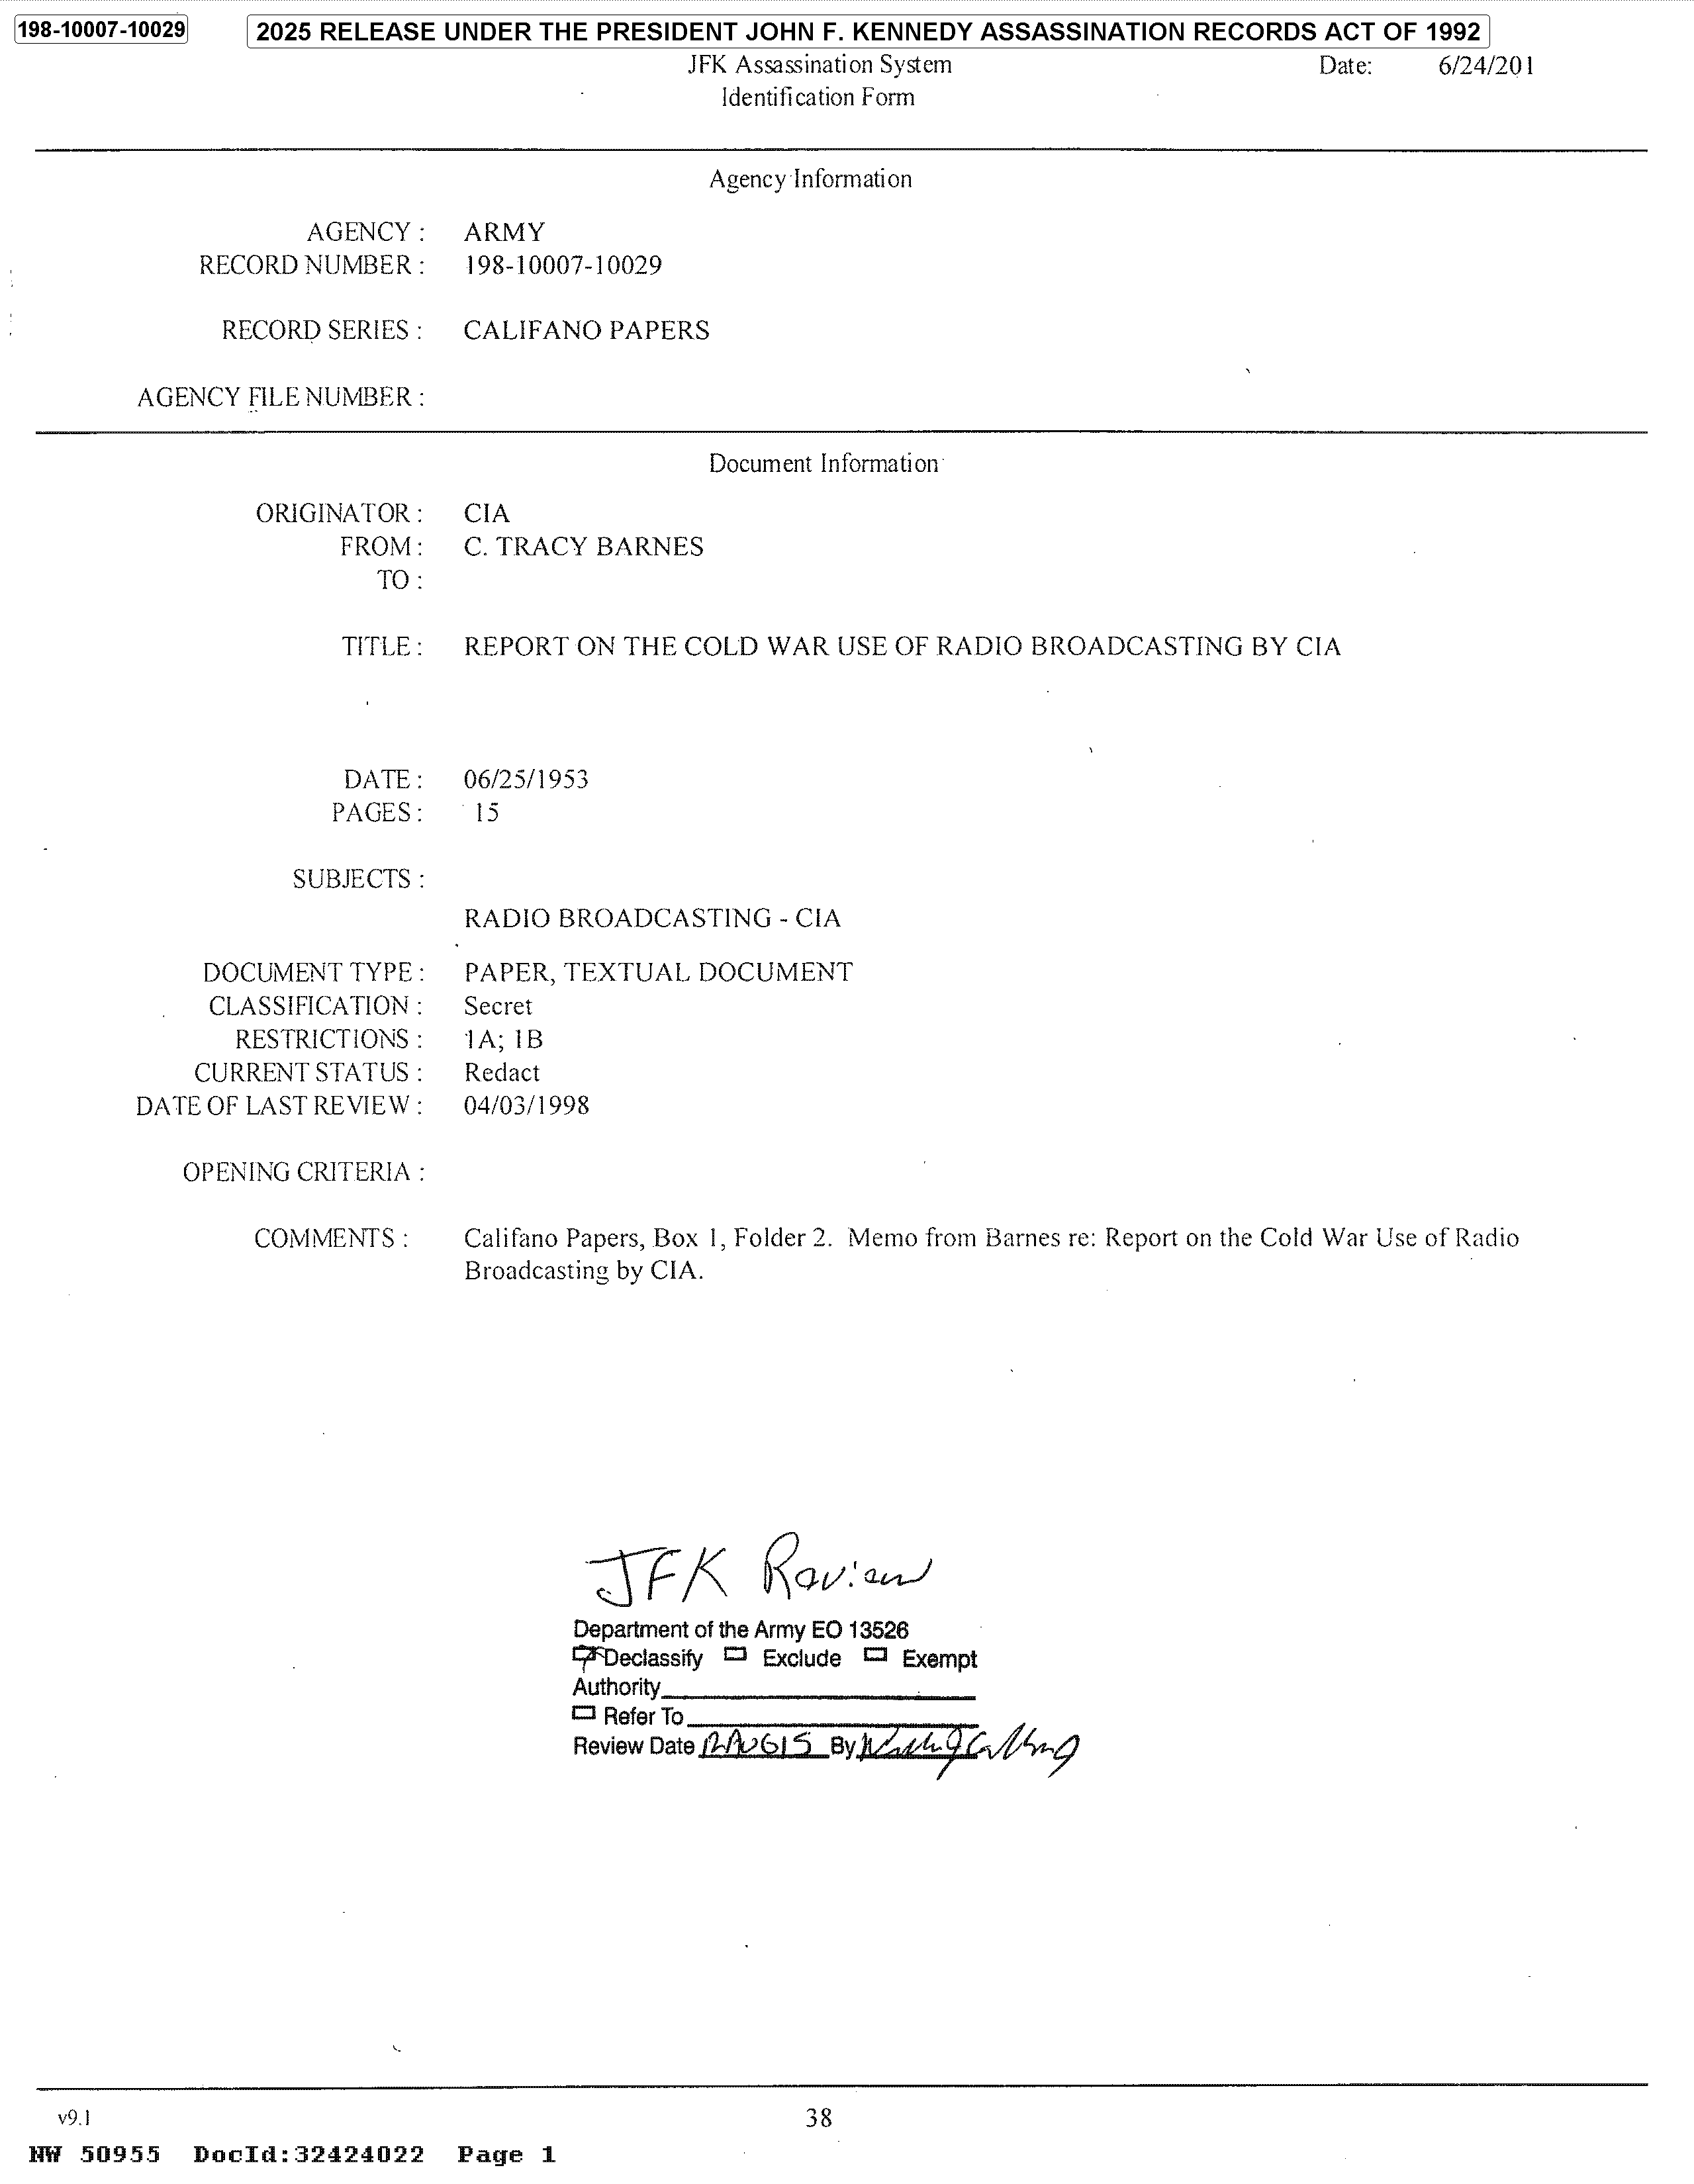

In [12]:
display(Image(dir+image_paths[0]))